In [0]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

data = pd.read_csv(uri)                   # creating variable cointaining all the information
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [0]:
swap = {
    0 : 1,
    1 : 0
}

data["finished"] = data.unfinished.map(swap)  # creating a extra column -> finished projects
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


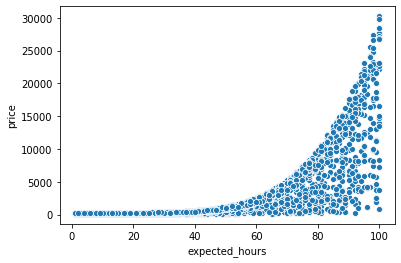

In [0]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', data = data)

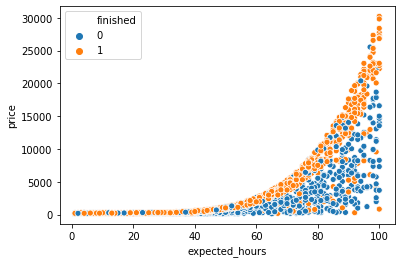

In [0]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', hue='finished', data = data)

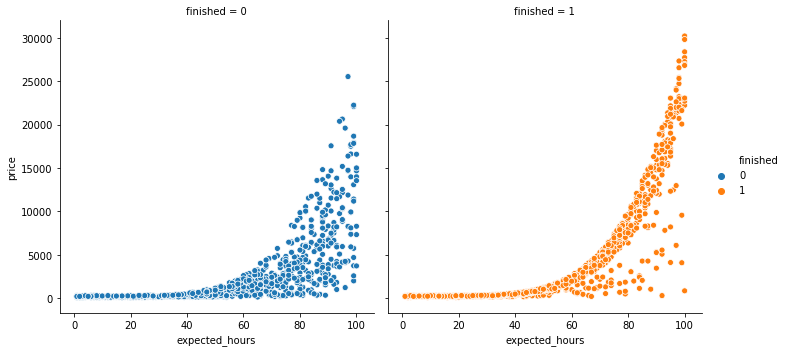

In [0]:
sns.relplot(x='expected_hours', y='price', hue='finished', col='finished', data = data)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = data[['expected_hours', 'price']]
y = data['finished']
SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Trained with %d elements and tested with %d elements" % (len(train_x), len(test_x)))

predict_model = LinearSVC()                                     # creating the predict model
predict_model.fit(train_x, train_y)                             # training the predict model
model_predictions = predict_model.predict(test_x)               # checking predictions with the desired results

model_accuracy = accuracy_score(test_y, model_predictions) * 100
print("The model accuracy is %.2f%%" % model_accuracy)

Trained with 1617 elements and tested with 540 elements
The model accuracy is 64.44%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
import numpy as np

baseline = np.ones(540)                                              # creating a baseline to compare with prediction model
accuracy = accuracy_score(test_y, baseline)*100                      # checking accuracy of the baseline 
print("The accurary of the baseline is %.2f%%"%accuracy)


The accurary of the baseline is 52.59%


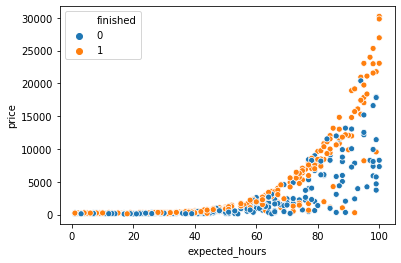

In [0]:
sns.scatterplot(x="expected_hours", y="price", hue=test_y, data=test_x)

In [0]:
x_min = test_x.expected_hours.min()                 # Creating the x min of the chart 
x_max = test_x.expected_hours.max()                 # Creating the x max of the chart

y_min = test_x.price.min()                          # Creating the y min of the chart
y_max = test_x.price.max()                          # Creating the y max of the chart

print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [0]:
pixels = 100
axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels) # Defining the axis x for the chart
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels) # Defining the axis y for the chart

In [0]:
xx, yy = np.meshgrid(axis_x, axis_y)                       # creating every x and y inside the chart
grid_points = np.c_[xx.ravel(), yy.ravel()]                # creating every point of the chart (matching x with y)
grid_points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [0]:
Z = predict_model.predict(grid_points)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

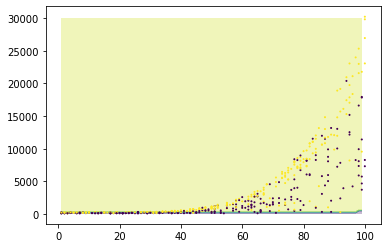

In [0]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = data[['expected_hours', 'price']]
y = data['finished']
SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Trained with %d elements and tested with %d elements" % (len(train_x), len(test_x)))

predict_model = SVC()                                           # creating the predict model - a non-linear and more free
predict_model.fit(train_x, train_y)                             # training the predict model
model_predictions = predict_model.predict(test_x)               # checking predictions with the desired results

model_accuracy = accuracy_score(test_y, model_predictions) * 100
print("The model accuracy is %.2f%%" % model_accuracy)

Trained with 1617 elements and tested with 540 elements
The model accuracy is 59.07%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


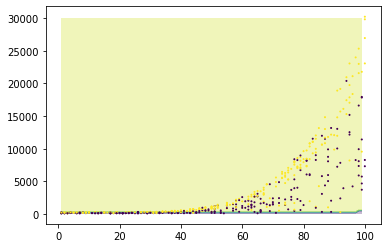

In [0]:
x_min = test_x.expected_hours.min()                 # Creating the x min of the chart 
x_max = test_x.expected_hours.max()                 # Creating the x max of the chart

y_min = test_x.price.min()                          # Creating the y min of the chart
y_max = test_x.price.max()                          # Creating the y max of the chart

pixels = 100
axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels) # Defining the axis x for the chart
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels) # Defining the axis y for the chart

xx, yy = np.meshgrid(axis_x, axis_y)                       # creating every x and y inside the chart
grid_points = np.c_[xx.ravel(), yy.ravel()]                # creating every point of the chart (matching x with y)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)


In [62]:
# Rescaling axis X and Y to be the same

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = data[['expected_hours', 'price']]
y = data['finished']
SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Trained with %d elements and tested with %d elements" % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

predict_model = SVC()                                           # creating the predict model - a non-linear and more free
predict_model.fit(raw_train_x, train_y)                             # training the predict model
model_predictions = predict_model.predict(test_x)               # checking predictions with the desired results

model_accuracy = accuracy_score(test_y, model_predictions) * 100
print("The model accuracy is %.2f%%" % model_accuracy)

Trained with 1617 elements and tested with 540 elements
The model accuracy is 52.59%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


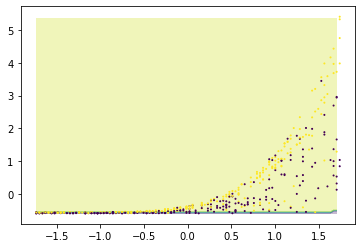

In [63]:
data_x = test_x[:, 0]
data_y = test_x[:, 1]

x_min = data_x.min()                                       # Creating the x min of the chart 
x_max = data_x.max()                                       # Creating the x max of the chart
y_min = data_y.min()                                       # Creating the y min of the chart
y_max = data_y.max()                                       # Creating the y max of the chart

pixels = 100
axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels) # Defining the axis x for the chart
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels) # Defining the axis y for the chart

xx, yy = np.meshgrid(axis_x, axis_y)                       # creating every x and y inside the chart
grid_points = np.c_[xx.ravel(), yy.ravel()]                # creating every point of the chart (matching x with y)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)

# Decision Boundary